# New Assignment- Classification KEY
In this assignment, you will be making and testing a k-Nearest Neighbors classification model. 

## Understanding the Data
We will be working with a data set built into R called Iris. It contains information on many different Iris flowers, including sepal length and width, petal length and width, and flower species. You can use the pictures below to help you better understand what the data is talking about.

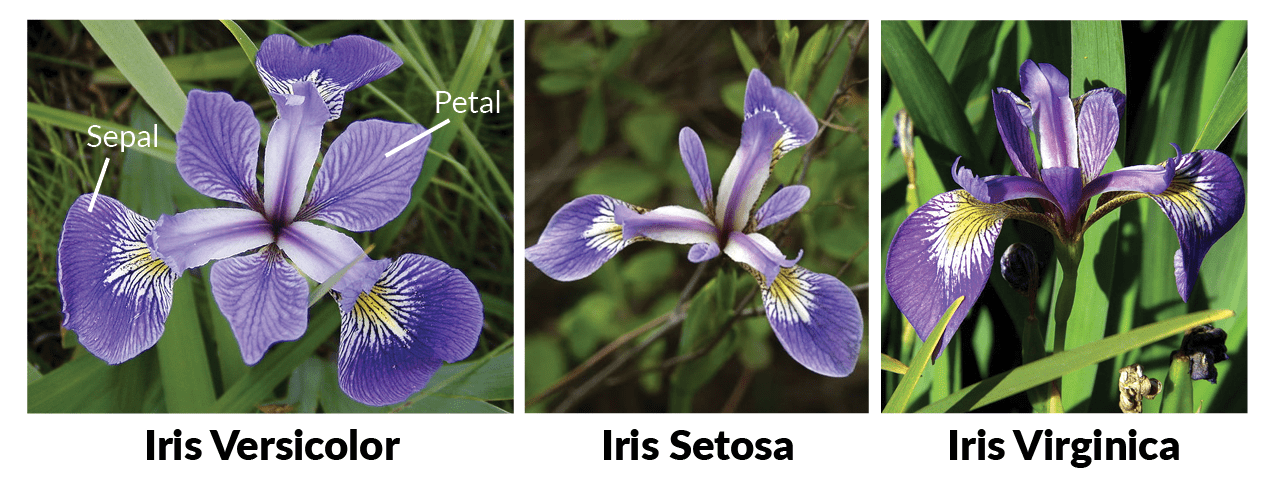

 Also, run this code to see the actual data.

In [56]:
options(repr.matrix.max.rows=1000)
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


Let's investigate this data further. Use the function summary() with `iris` as the parameter to see the minimum, first quantile, median, mean, third quantile, and maximum values for the data set.

In [42]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

We will be using many packages in this assignment, so run the code below to install and import the packages to this notebook. If you haven't used any of these packages before or do not have them installed, install them with `install.packages()`.

In [40]:
install.packages("gmodels")
install.packages('ggvis')
library(ggvis)
library(class)
library(gmodels)
library(caret)

Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'gmodels' is in use and will not be installed"Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'ggvis' is in use and will not be installed"

Now, run this code to see a scatterplot of sepal width vs sepal length and another scatterplot of petal width vs petal length. These graphs should be displayed in different tabs in chrome or your internet browser.

In [43]:
iris %>% ggvis(~Sepal.Length, ~Sepal.Width, fill = ~Species) %>% layer_points()
iris %>% ggvis(~Petal.Length, ~Petal.Width, fill = ~Species) %>% layer_points()

## Creating Training and Testing Sets

We want to be able to predict the species of a flower based on its petal and sepal width and length. To do this, we are going to divide the data into two sets- training and test.  The code below has a .67 chance of selecting each flower to be a part of the training set, and if it is not selected for the training set, the flower is put into the test set.

In [50]:
set.seed(1234)
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.67, 0.33))

# Compose training set
iris.training <- iris[ind==1, 1:4]

# Compose test set
iris.test <- iris[ind==2, 1:4]

Now let's look at the first 6 elements in both the training and test set, use the `head()` function on both sets to display them.

In [51]:
# Inspect training set
head(iris.training)


# Inspect test set
cat("Test: ")
head(iris.test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3


Test: 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5,5.0,3.6,1.4,0.2
11,5.4,3.7,1.5,0.2
14,4.3,3.0,1.1,0.1
16,5.7,4.4,1.5,0.4
26,5.0,3.0,1.6,0.2
28,5.2,3.5,1.5,0.2


Next, we are going to display the labels corresponding to each flower in the 2 sets. To do this, make 2 variables (`iris.trainLabels` and `iris.testLabels`). To do this, set `iris.trainLabels` equal to irisind==1, 5\] and `iris.testLabels `to iris\[ind==2, 5\]. Then `print()` both sets. You should see 2 sets of flower species: one twice as large as the other and both sets should contain all 3 species types.

In [45]:
# Compose `iris` training labels
cat("Training Labels: \n")
iris.trainLabels <- iris[ind==1, 5]

# Inspect result
print(iris.trainLabels)

# Compose `iris` test labels
iris.testLabels <- iris[ind==2, 5]

# Inspect result
cat("\n\nTest Labels: \n")
print(iris.testLabels)

Training Labels: 
  [1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor virginica  virginica 
 [79] virginica  virginica  virginica  virgini

## Building the Model

Next, we are going to actually build the model using knn(). It takes as arguments the training set, test set, training labels, and amount of neighbors you want to find with the algorithm (the "k" value). If you need help, look at the classification demo and look at the knn() documentation online. Use a k value of 3. Display the result (it should be species names).

In [52]:
# Build the model
iris_pred <- knn(iris.training, iris.test, iris.trainLabels, k=3)

# Inspect `iris_pred`
iris_pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  versicolor virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

## Testing the Model
Now, we are going to view our results. Run the code below to see the prediction next to the observed species to see how our classification did!

In [47]:
# Put `iris.testLabels` in a data frame
irisTestLabels <- data.frame(iris.testLabels)

# Merge `iris_pred` and `iris.testLabels` 
merge <- data.frame(iris_pred, iris.testLabels)

# Specify column names for `merge`
names(merge) <- c("Predicted Species", "Observed Species")

# Inspect `merge` 
merge

Predicted Species,Observed Species
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
